In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
dissolved_oxygen = [5.0, 3.4, 3.9, 1.3, 0.2, 0.9, 2.7, 3.7, 3.8, 4.1, 1.0, 1.0, 0.8, 0.4, 3.8, 4.5, 5.3, 6.1, 6.9, 6.5]

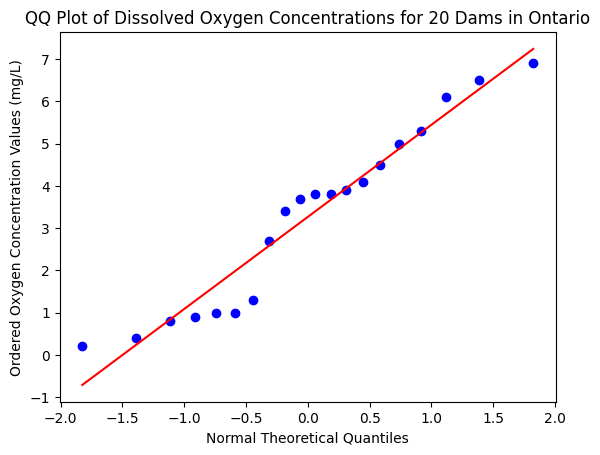

In [11]:
# Create a QQ plot
stats.probplot(dissolved_oxygen, dist="norm", plot=plt)
plt.title('QQ Plot of Dissolved Oxygen Concentrations for 20 Dams in Ontario')
plt.xlabel('Normal Theoretical Quantiles')
plt.ylabel('Ordered Oxygen Concentration Values (mg/L)')
plt.show()

In [17]:
sum(dissolved_oxygen)/20

3.2649999999999997

In [31]:
alpha = 1 - 0.80
n = len(dissolved_oxygen)
mean = np.mean(dissolved_oxygen)
std_dev = np.std(dissolved_oxygen, ddof=1)
t_critical = stats.t.ppf(1-alpha/2, df=n-1)
print(t_critical)
std_err = std_dev / np.sqrt(n)

ci_lower = mean - t_critical * std_err
ci_upper = mean + t_critical * std_err

print((ci_lower, ci_upper))

1.3277282090267986
(2.63341763581658, 3.8965823641834194)
